In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [267]:
# filename = "test"
def get_data(filename):
    with open(filename) as f:
        lines = [ln.strip().replace("  ", " ").split(" ") for ln in f.readlines()]

    def get_line(line):
        x1, y1 = line[0].split(",")
        x2, y2 = line[-1].split(",")
        return {"x1": int(x1), "y1": int(y1), "x2": int(x2), "y2": int(y2)}

    return pd.DataFrame([get_line(l) for l in lines])


df = get_data("input")


In [268]:
df.describe()


,x1,y1,x2,y2
count,500.000000,500.000000,500.000000,500.000000
mean,499.688000,503.088000,494.166000,501.560000
std,305.617943,294.832408,309.219255,295.016304
min,10.000000,11.000000,10.000000,10.000000
25%,216.500000,245.000000,207.750000,257.500000
50%,511.000000,515.500000,486.500000,499.500000
75%,774.000000,764.250000,778.500000,768.750000
max,990.000000,989.000000,988.000000,988.000000


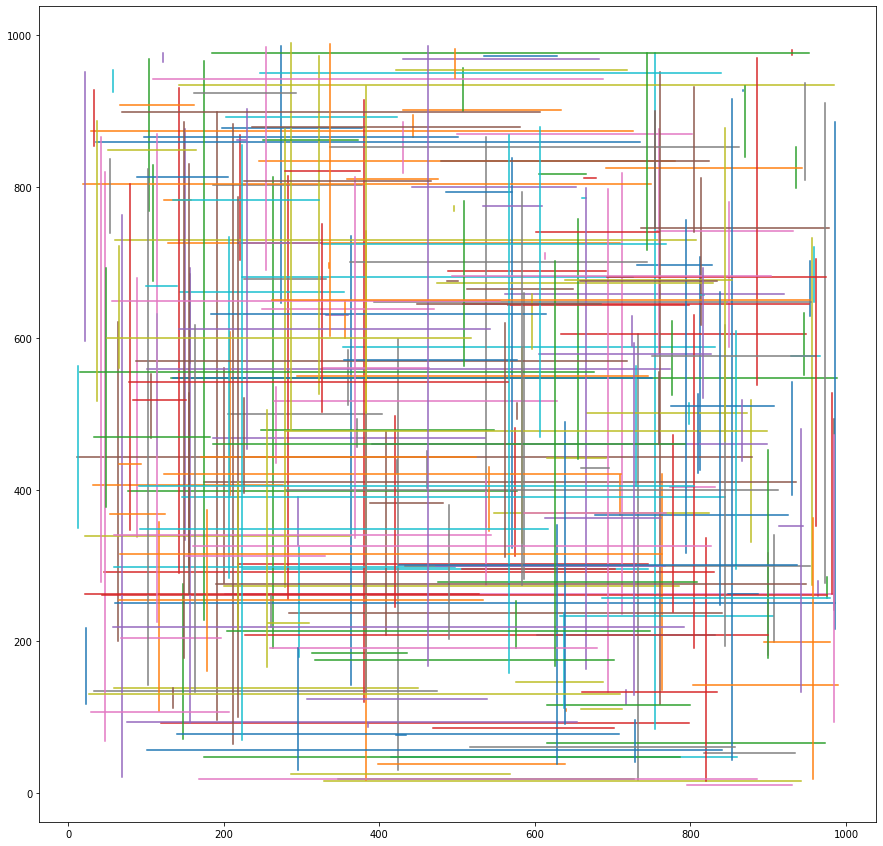

In [269]:
fig, ax = plt.subplots(figsize=(15, 15))
# ax.grid()
mask_vert = df["x1"] == df["x2"] 
mask_horz = df["y1"] == df['y2']
for ix, (x1, y1, x2, y2) in df[mask_horz | mask_vert].iterrows():
    ax = plt.plot([x1, x2], [y1, y2], "-")


In [278]:
grid = np.ones((1000, 1000), dtype=np.int16) * -1
for ix, (x1, y1, x2, y2) in df[mask_horz].iterrows():
    # print(" ", x1 - x2, x1, x2)
    for walker_x in range(min(x1, x2), max(x1, x2) + 1):
        # print(walker_x)
        grid[walker_x, y1] += 1

for ix, (x1, y1, x2, y2) in df[mask_vert].iterrows():
    # print(" ", x1 - x2, x1, x2)
    for walker_y in range(min(y1, y2), max(y1, y2) + 1):
        # print(walker_x)
        grid[x1, walker_y] += 1

grid[grid < 0] = 0
print(grid)
# sum(grid)
sum(grid.flatten() > 0)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


7380